In [813]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [814]:
df=pd.read_csv("Documents/Topgear/ex1data1.txt",names=["Population","Profit"])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [815]:
df.shape

(97, 2)

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


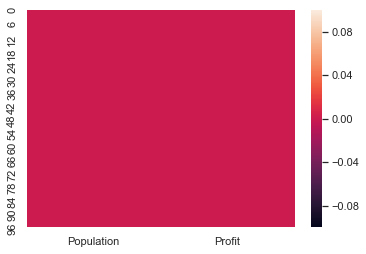

In [817]:
sns.heatmap(df.isnull())

In [818]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


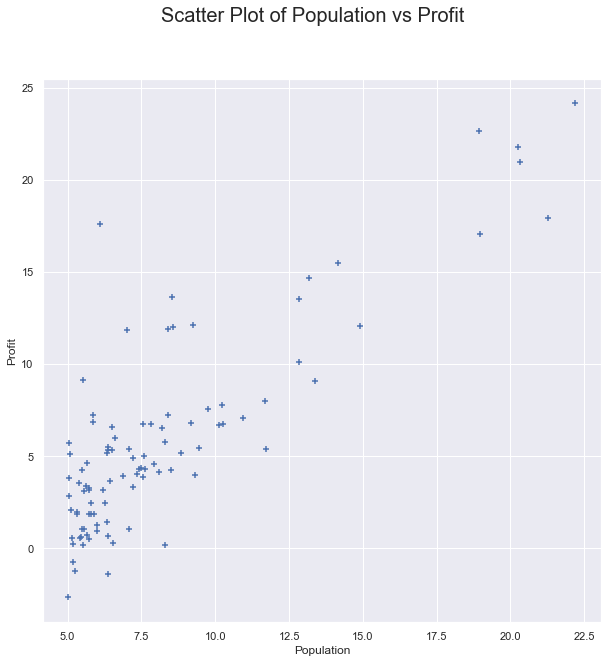

In [819]:
f=plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
f.add_subplot(111)
plt.scatter(x="Population",y="Profit",data=df,s=30,cmap="coolwarm",marker="+")
plt.xlabel("Population")
plt.ylabel("Profit")
f.suptitle("Scatter Plot of Population vs Profit",size=20)
plt.grid("True")

In [820]:
np.corrcoef(df["Population"],df["Profit"])[0,1]

0.837873232526341

In [821]:
df.skew(axis=0)

Population    2.108093
Profit        1.433373
dtype: float64

In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


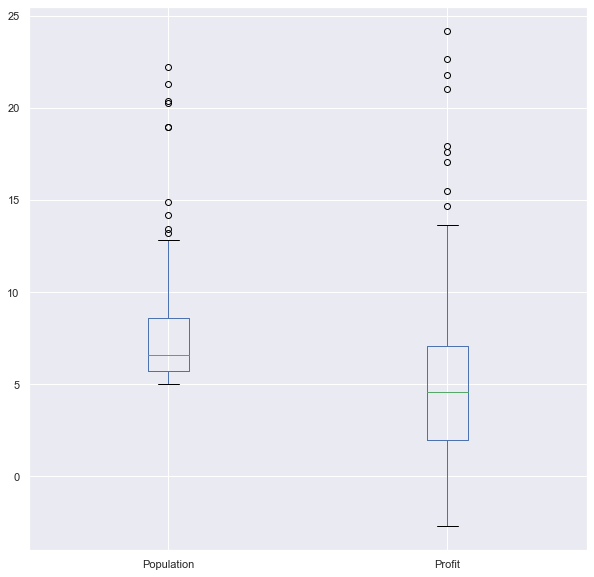

In [823]:
plt.figure(figsize=(10,10))
df.boxplot(column=["Population","Profit"])

In [824]:
#Q1=df.quantile(0.25)
#Q3=df.quantile(0.75)
#IQR=Q3-Q1
#df=df[~((df<(Q1-2.1*IQR))|(df>(Q3+2.1*IQR))).any(axis=1)]
#print("Length after removing outliers:",len(df))
#df.head()

In [825]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)
df[0:5]

array([[-0.53240565,  2.14398492],
       [-0.68368294,  0.60036371],
       [ 0.09319761,  1.4270652 ],
       [-0.30042464,  1.09724564],
       [-0.5974206 ,  0.17953366]])

In [826]:
X=df[:,0]
Y=df[:,1]


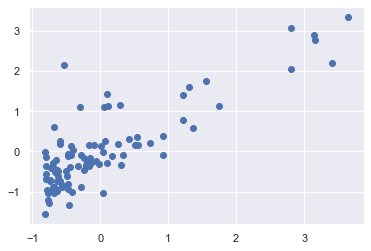

In [827]:
plt.scatter(X,Y)

In [828]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X-Shapes:\nX_train: X_test\n",X_train.shape,X_test.shape,"\n")
print("Y-Shapes:\nY_train: Y_test\n",Y_train.shape,Y_test.shape)
X_test

X-Shapes:
X_train: X_test
 (77,) (20,) 

Y-Shapes:
Y_train: Y_test
 (77,) (20,)


array([ 3.40768709, -0.71506051, -0.74142494, -0.44941614, -0.77181546,
        0.4179087 ,  2.80507153,  0.92163816, -0.63614904, -0.53240565,
       -0.40790839, -0.41868794, -0.61258989,  1.21255602, -0.08704158,
       -0.5974206 , -0.69344947, -0.63009691, -0.80532297, -0.24257874])

In [829]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
m=len(X_train)
X_train=X_train.reshape(m,1)
Y_train=Y_train.reshape(m,1)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [830]:
m=len(X_test)
X_test=X_test.reshape(m,1)
Y_test=Y_test.reshape(m,1)
Y_pred=model.predict(X_train)
model.score(X_test,Y_test)


0.5003441133385784

Text(0.5, 1.0, 'Linear Regression')

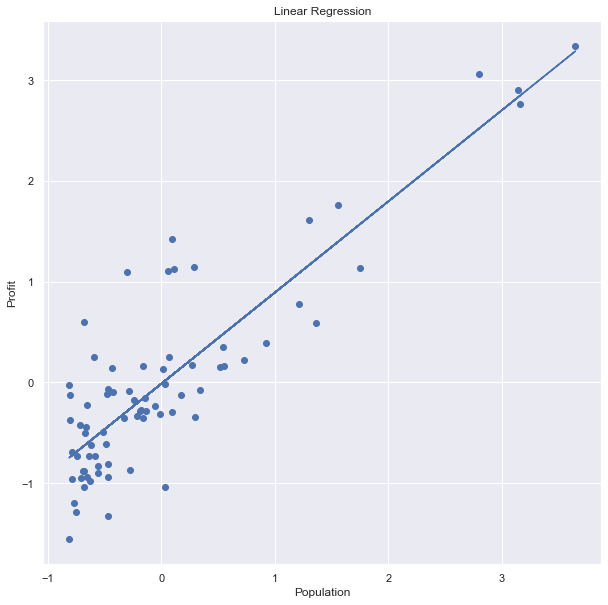

In [831]:
plt.figure(figsize=(10,10))
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear Regression")

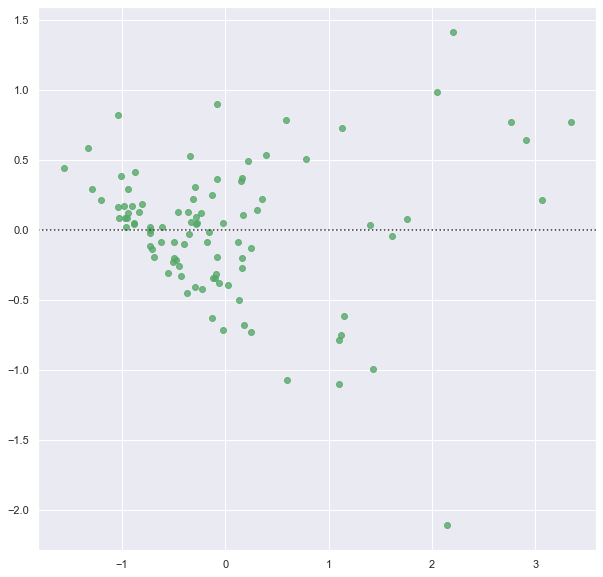

In [832]:
plt.figure(figsize=(10,10))
m=len(X)
X=X.reshape(m,1)
Y=Y.reshape(m,1)
y_pred_all=model.predict(X)
sns.residplot(Y,y_pred_all,color="g")

In [848]:
y_pred_test=model.predict(X_test)
print(model.score(X_train,Y_train))



0.7513605550608945


In [849]:
print("Cofficient:{},Intercept:{}".format(model.coef_,model.intercept_))

Cofficient:[[0.9042376]],Intercept:[-0.01195878]


Text(0, 0.5, 'Profit')

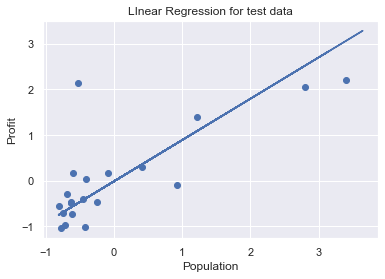

In [850]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,model.predict(X_train))
plt.title("LInear Regression for test data")
plt.xlabel("Population")
plt.ylabel("Profit")

In [855]:
#from statsmodels.formula.api import ols
import statsmodels.api as sm
regressor_ols=sm.OLS(endog=Y_train,exog=X_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.748
Method:                 Least Squares   F-statistic:                              229.6
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                    1.14e-24
Time:                        20:17:38   Log-Likelihood:                         -55.179
No. Observations:                  77   AIC:                                      112.4
Df Residuals:                      76   BIC:                                      114.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9043      0.060     15.152      0.000       0.785       1.023
==============================================================================
Omnibus:                        9.777   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.558
Skew:                           0.802   Prob(JB):                      0.00840
Kurtosis:                       3.636   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""